In [678]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(6, 1)
poly = PolynomialFeatures(3)
poly.fit_transform(X)

array([[  1.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

In [679]:
poly.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3'], dtype=object)

In [680]:
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [681]:
def get_target(X):
    return X* np.cos(X**2)

In [682]:
import matplotlib.pyplot as plt

In [683]:
plt.figure()
plt.show()
plt.close();
plt.rcParams.update({'font.size':16, 'figure.figsize':(10, 6)})

<Figure size 720x432 with 0 Axes>

In [684]:
X = np.linspace(-2, 6, 10_000)[:,np.newaxis]
y = get_target(X)

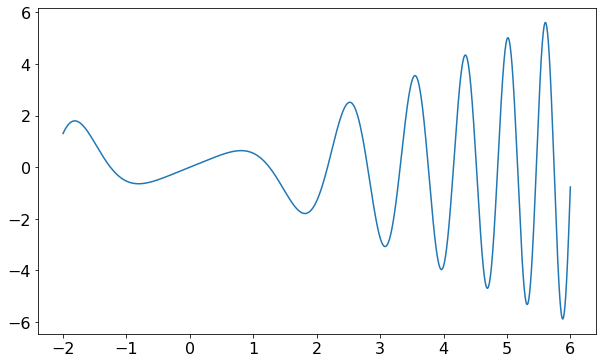

In [685]:
plt.plot(X, y)

In [686]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [687]:
def build_and_compile_model(input_shape, units=64):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(units, activation='relu'),
        layers.Dense(units, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [688]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [689]:
# batch_size = 32
batch_size = 128
# batch_size = 512

epochs=1000
# epochs=500
# epochs=100

# units=32
# units=64
units=128

In [690]:
model_baseline = build_and_compile_model(input_shape=(X_train.shape[1], ), units=units)

In [691]:
%%time
history_baseline = model_baseline.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    verbose=0, epochs=epochs, batch_size=batch_size)

CPU times: user 3min 43s, sys: 1min 55s, total: 5min 39s
Wall time: 4min 53s


In [692]:
poly = PolynomialFeatures(3)
# poly = PolynomialFeatures(5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)



In [693]:
model_poly = build_and_compile_model(input_shape=(X_train_poly.shape[1], ), units=units)

In [694]:
%%time
history_poly = model_poly.fit(
    X_train_poly, y_train,
    validation_data=(X_test_poly, y_test),
    verbose=0, epochs=epochs, batch_size=batch_size)

CPU times: user 3min 35s, sys: 1min 54s, total: 5min 30s
Wall time: 4min 44s


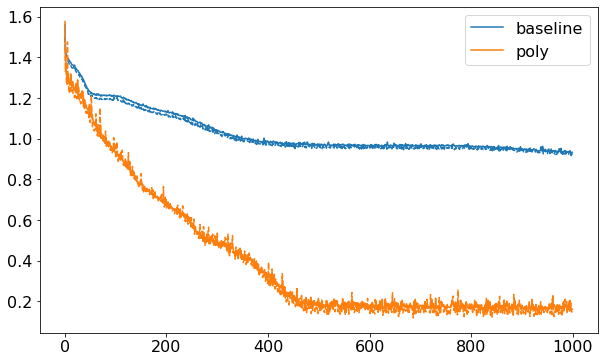

In [695]:
plt.plot(history_baseline.history['loss'], c='C0', label='baseline')
plt.plot(history_baseline.history['val_loss'], c='C0', ls='--')

plt.plot(history_poly.history['loss'], c='C1', label='poly')
plt.plot(history_poly.history['val_loss'], c='C1', ls='--')
plt.legend()

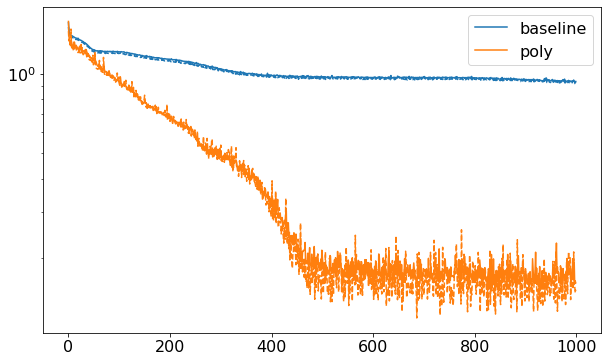

In [696]:
plt.plot(history_baseline.history['loss'], c='C0', label='baseline')
plt.plot(history_baseline.history['val_loss'], c='C0', ls='--')

plt.plot(history_poly.history['loss'], c='C1', label='poly')
plt.plot(history_poly.history['val_loss'], c='C1', ls='--')
plt.legend()

plt.yscale('log')

In [697]:
X_holdout = np.random.uniform(-2, 6, (10000, 1))
y_holdout = get_target(X_holdout)

In [698]:
X_holdout_poly = poly.transform(X_holdout)

In [699]:
yhat_baseline = model_baseline.predict(X_holdout, verbose=0)

In [700]:
yhat_poly = model_poly.predict(X_holdout_poly, verbose=0)

In [701]:
import pandas as pd

In [702]:
df = pd.DataFrame(np.c_[X_holdout, y_holdout]).sort_values(by=0)
df_b = pd.DataFrame(np.c_[X_holdout, yhat_baseline]).sort_values(by=0)
df_p = pd.DataFrame(np.c_[X_holdout, yhat_poly]).sort_values(by=0)

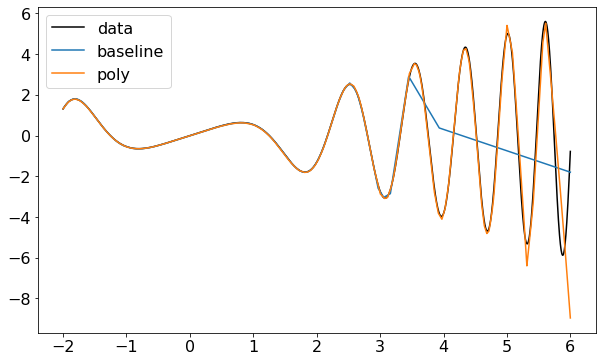

In [703]:
plt.plot(df[0], df[1], label='data', c='k')
plt.plot(df_b[0], df_b[1], label='baseline')
plt.plot(df_p[0], df_p[1], label='poly')
plt.legend()

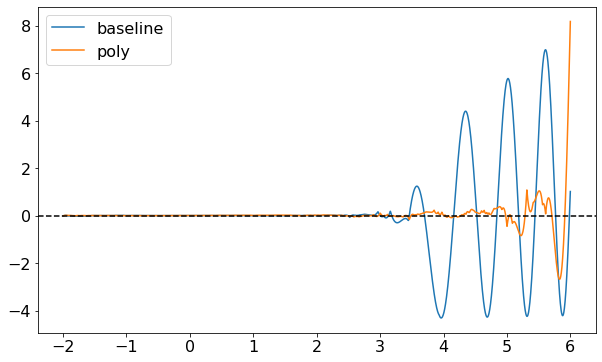

In [704]:
plt.plot(df[0], df[1]-df_b[1], label='baseline')
plt.plot(df[0], df[1]-df_p[1], label='poly')
plt.legend()
plt.axhline(0, c='k', ls='--')

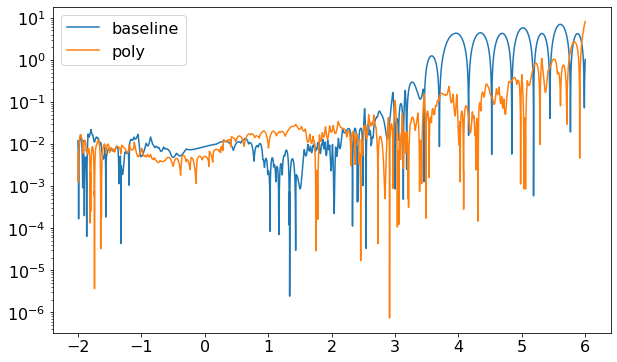

In [705]:
plt.plot(df[0], np.abs(df[1]-df_b[1]), label='baseline')
plt.plot(df[0], np.abs(df[1]-df_p[1]), label='poly')
plt.yscale('log')
plt.legend()